In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('daily-min-temp.csv', names=["Date", "Temp"],on_bad_lines="skip",header=0)
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.describe()

,Date,Temp
count,3650,3650
unique,3650,230
top,1981-01-01,11.0
freq,1,51


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3650 non-null   object
 1   Temp    3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [6]:
df.isnull().sum()

Date    0
Temp    0
dtype: int64

In [7]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
# Set Date as index (important for time series)
df.set_index("Date", inplace=True)

In [9]:
df.tail()

,Temp
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


In [10]:
df.shape

(3650, 1)

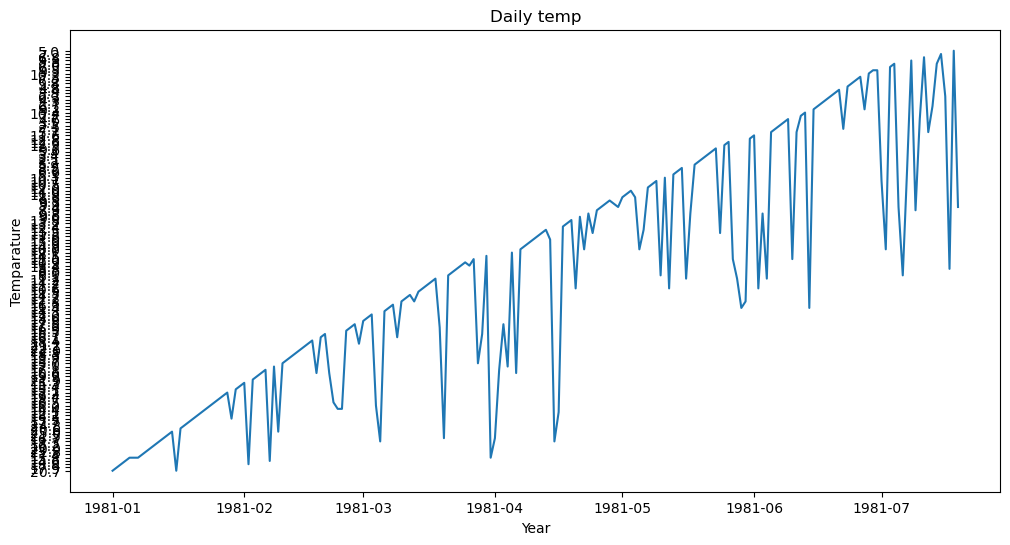

In [11]:

plt.figure(figsize=(12,6))
plt.plot(df['Temp'][:200])
plt.title('Daily temp')
plt.xlabel('Year')
plt.ylabel('Temparature')
plt.show()

In [12]:
# Convert Temp column to numeric (force errors to NaN if junk values exist)
df["Temp"] = pd.to_numeric(df["Temp"], errors="coerce")

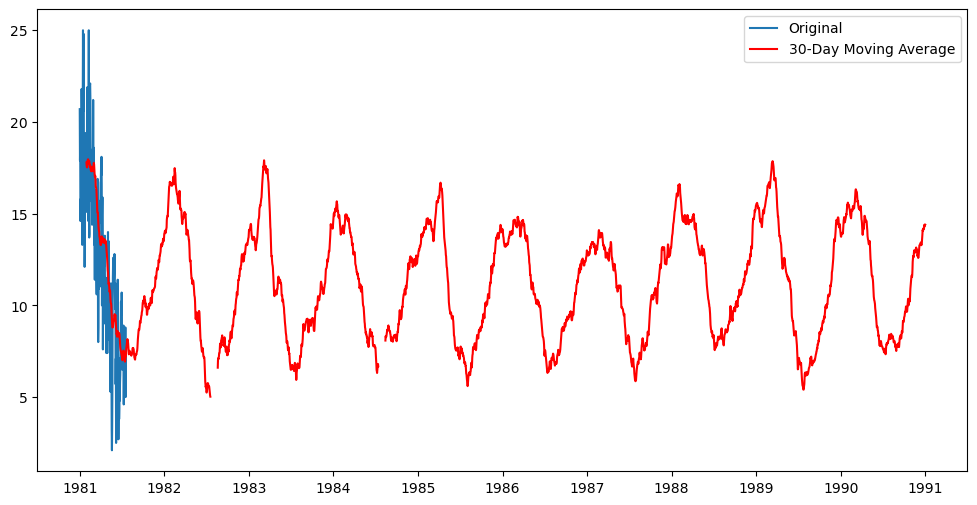

In [13]:
df['window'] = df['Temp'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Temp'][:200], label="Original")
plt.plot(df['window'], label="30-Day Moving Average", color='red')
plt.legend()
plt.show()


In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA
model = ARIMA(df['Temp'], order=(5,1,0))  
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
print(forecast)


C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


3650    13.241826
3651    13.643934
3652    13.767855
3653    13.758559
3654    13.911376
3655    13.710516
3656    13.640625
3657    13.682841
3658    13.724863
3659    13.735728
3660    13.744963
3661    13.725919
3662    13.711039
3663    13.712817
3664    13.720280
3665    13.724162
3666    13.725084
3667    13.722702
3668    13.720205
3669    13.719886
3670    13.720957
3671    13.721828
3672    13.722051
3673    13.721724
3674    13.721311
3675    13.721186
3676    13.721322
3677    13.721484
3678    13.721544
3679    13.721502
Name: predicted_mean, dtype: float64


C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Train-test split
train = df['Temp'][:3000]
test = df['Temp'][3000:]

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)


C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 6.164911084722987


C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


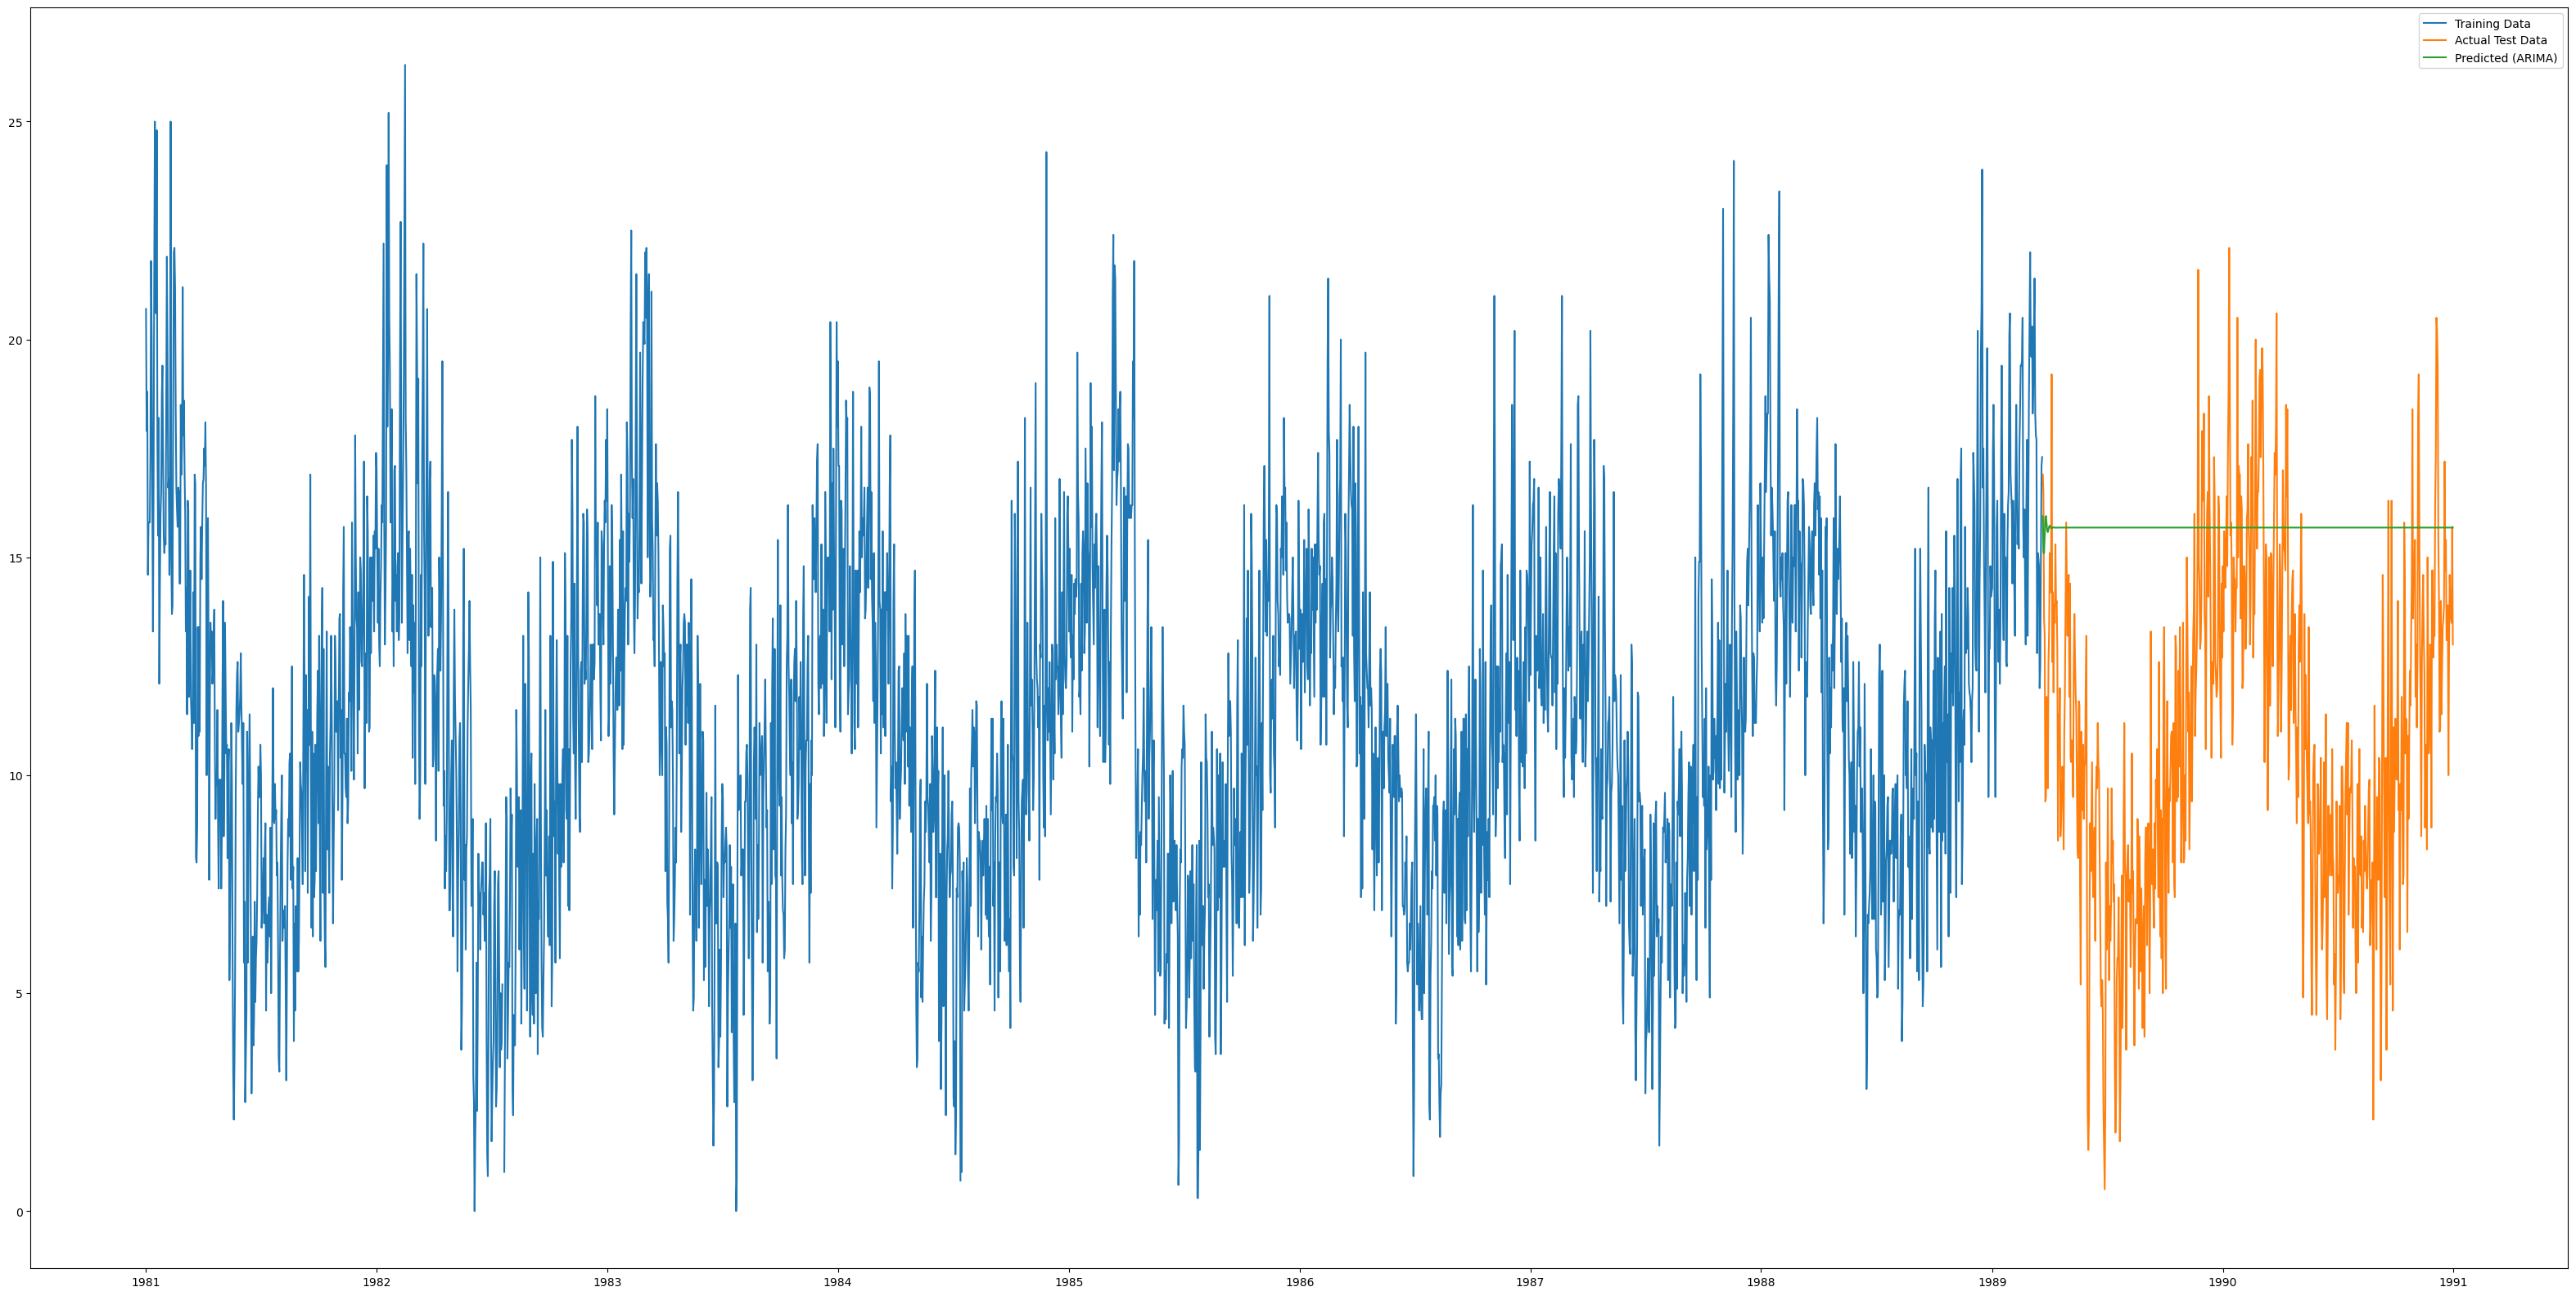

In [22]:
# Plot actual vs predicted
plt.figure(figsize=(40,20))
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual Test Data")
plt.plot(test.index, forecast, label="Predicted (ARIMA)")
plt.legend()
plt.show()